## Generatore di numeri casuali

### Calcolo di integrali con metodi Monte Carlo

In questo foglio vogliamo testare il generatore di numeri casuali affrontando il problema del calcolo di un integrale (deterministico) con un metodo Monte Carlo (probabilistico).
L'idea di base è la seguente. Consideriamo la seguente quantità, in cui la dimensionalità del problema non è specificata per generalità:

$$
I = \mu_f = \int_\Omega f(x) p(x) dx  \qquad con \quad p(x) \geq 0 \space, \space \int_\Omega p(x) dx = 1 \,. \label{eq1}
$$

Calcolare questo integrale con un metodo Monte Carlo significa utilizzare un metodo statistico per ottenere una $\textit{stima}$ (con inevitabilmente un errore) del valore della quantità $I$, che è un numero reale senza alcun tipo di errore. 

Il metodo più semplice, che è anche quello che utilizzeremo qui, è di effettuare un sampling  $S = $ {$x_1\,,x_2\,, ..., x_N$} della distribuzione di probabilità $p(x)$ e assumere come stima di $I$ lo stimatore del valor medio di $f$

$$
\bar f _S = \frac{1}{N} \sum_{x_i \in S} f(x_i) \,. \tag{1}
$$

Essendo le  {$f(x_i)$}  realizzazioni di random variabili indipendenti ed identicamente distribuite (secondo $p$), il teorema del limite centrale ci dice che l'errore che commettiamo nello stimare in questo modo il valor medio di $f$ è $\epsilon = \sigma_f/\sqrt N$, dove

$$
\sigma_f^2 = \int_\Omega f^2(x) p(x) dx - I^2 \,.
$$

Il problema che si incontra procedendo così è che se stiamo usando un metodo numerico per valutare $\mu_f$ difficilmente (eccetto rari casi) saremo in grado di avere un valore numerico per la quantità $\sigma_f$ e quindi per l'errore $\epsilon$. Una possibile soluzione è ovviamente quella di applicare il metodo appena esposto per valutare anche $\sigma_f$, ma vogliamo ora mostrare come, sfruttando ancora il teorema del limite centrale, il problema possa essere risolto. Un altro modo di procedere è infatti di introdurre una nuova "dimensione" al nostro schema, nella maniera seguente. Se dal sample $S$ abbiamo potuto estrapolare la stima $\bar f _S$, possiamo ripetere la procedura con un nuovo sample $S'$ e ottenere una seconda stima $\bar f _{S'}$. Supponiamo quindi di avere $M$ sample {$S_1\,,S_2\,,..., S_M$} dai quali abbiamo ottenuto $M$ stime {$\bar f _{1}\,,\bar f _{2}\,,..., \bar f _{M}$} per $\mu_f$. Il valor medio delle $\bar f_j$ è dato da

$$
\overline{F} = \frac{1}{M}\sum_{j = 1}^M \bar f _{j} \tag{2}
$$

ed è evidente che per costruzione $\overline{F}$ è una stima del valor medio $\mu_f$. Grazie al nostro super-campione {$\bar f _{1}\,,\bar f _{2}\,,..., \bar f _{M}$} possiamo ora dare una $\textit{stima}$ della varianza di $f$ tramite la seguente formula

$$
 \sigma_{\bar f}^2 = \frac{1}{M}\sum_{j = 1}^M \bar f _{j}^2 - \overline F^2 \tag{3}
$$

In questo modo possiamo stimare direttamente $\epsilon$ senza passare da $\sigma_f$, ma ora possiamo anche fare di meglio! $\epsilon$ è infatti l'errore sulla $\textit{singola}$ stima $\bar f_j$, ma nel nostro procedimento noi ne abbiamo accumulate $M$ e la stima migliore per il valor medio $\mu_f$ non è più $\bar f$ ma $\overline F$. L'errore su questa ci è dato ancora una volta applicando il teorema del limite centrale, in questo caso al sample {$\bar f _{1}\,,\bar f _{2}\,,..., \bar f _{M}$} e il risultato è 

$$
\sigma_{\overline F} = \frac{\sigma_{\bar f}}{\sqrt M} \, \tilde{=} \, \frac{\sigma_f}{\sqrt{N\times M}}. \tag{4}
$$

L'ultima uguaglianza è in probabilità, nel senso la quantità a sinistra è uno stimatore per quella a destra (a patto che le ipotesi del teorema del limite centrale siano soddisfatte ogni volta che lo si applica), e ci mostra anche come il risultato di questa procedura sia identico a quello che si otterrebbe utilizzando un campione inziale di cardinalità $N \times M$. Sorge quindi spontaneo chiedersi se ci sia qualche differenza fra i due metodi, e la risposta è sì: il metodo introdotto qui, detto $\textit{blocking}$ (i.e. suddividere un campione molto grande in $M$ campioni più piccoli e fare poi la statistica sulle quantità medie ottenute da questi campioni) si rende necessario nel caso in cui gli elementi del sample presentino delle correlazioni.


Applichiamo ora quanto visto a un caso molto semplice, in cui tutte le quantità sono calcolabili analiticamente in modo da poter fare un confronto tra i risultati teorici e quelli statistici. Negli esempi che consideriamo, inoltre, non vi sono problemi legati alle correlazioni fra i punti, dunque i risultati dovrebbero essere uguali sia che si applichi il   $\textit{blocking}$ sia che si usi direttamente un campione più grande.

### Stima dell'integrale $\langle x \rangle = \int_0^1 x dx = 1/2$.

Nel linguaggio della sezione precedente si ha:
- $\Omega = [0, 1) \subset \mathbb{R}$ 
- $p(x) = 1 \; \forall x \in \Omega$
- $f(x) = x $

La distribuzione $p$ è quella che rappresenta il generatore di numeri casuali che abbiamo testato: come spiegato sopra abbiamo fornito $M = 100$ stime dell'integrale $\langle x \rangle$, ciascuna ottenuta da un sample di $N = 1000$ punti, e abbiamo calcolato medie ed errori considerando via via un numero crescente delle stesse (da $1$ a $100$). Il risultato è contenuto nel grafico sottostante.

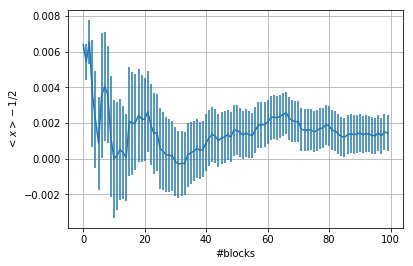

La miglior stima di <x> è  0.501438 +/- 0.0010100505037879044
Il valore vero di <x> è  0.5


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

def error(AV1,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV1[n] - AV2[n])/n)

# Carico da file 3 colonne di dati, contenenti il momento primo, secondo e 
# il momento primo quadrato    
I_ave, I2_ave, I_ave2 = np.loadtxt("mean.out", usecols=(0, 1, 2), delimiter=' ', unpack='true')

# Inizializzo una variabile che tenga conto della lunghezza dei miei vettori di dati
N = len(I_ave)
n = np.arange(N)
e = np.zeros(N)

# Calcolo la deviazione standard dalla media in funzione del blocco, utilizzando
# le quantità caricate da file
for i in range(N):
    e[i] = error(I2_ave, I_ave2,i)

# Faccio un grafico con barre d'errore

plt.errorbar(n, I_ave-0.5, e);
plt.xlabel('#blocks')
plt.ylabel('$<x>-1/2$')
plt.grid(True)
plt.show()

print('La miglior stima di <x> è ',I_ave[N-1], '+/-', e[N-1])
print('Il valore vero di <x> è ', 1/2)

### Stima dell'integrale $\sigma^2 = \int_0^1 (x-1/2)^2 dx = 1/12$.

Anche qui si è proceduto come sopra con la sola differenza che ora $f(x) = (x-1/2)^2$.

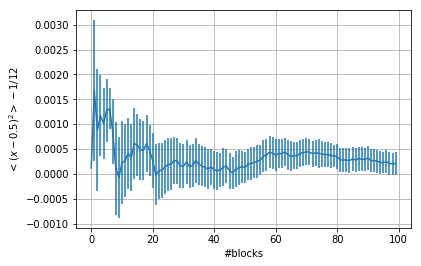

La miglior stima di <(x-0.5)^2> è  0.083541 +/- 0.00022473328748774278
Il valore vero di <x> è  0.08333333333333333


In [3]:
# Ripeto la procedura della cella precedente con i nuovi dati

V_ave, V2_ave, V_ave2 = np.loadtxt("variance.out", usecols=(0, 1, 2), delimiter=' ', unpack='true')
N = len(V_ave)
n= np.arange(N)
for i in range(N):
    e[i] = error(V2_ave, V_ave2,i)

plt.errorbar(n, V_ave-1/12, e);
plt.xlabel('#blocks')
plt.ylabel('$<(x-0.5)^2>-1/12$')
plt.grid(True)
plt.show()

print('La miglior stima di <(x-0.5)^2> è ',V_ave[N-1], '+/-', e[N-1])
print('Il valore vero di <x> è ', 1/12)

### Test $\chi^2$ dell'ipotesi di uniformità. 

In questa fase verifichiamo quanto il nostro generatore operi in maniera effettivamente casuale. Vogliamo cioè verificare quanto i numeri forniti dal generatore siano compatibili con una distribuzione uniforme $\mathcal{U}[0,1]$.  Per fare questo abbiamo generato $S = 100$ sample da $N = 10^4$ punti ciascuno tramite il generatore e abbiamo studiato come si disponevano all'interno dell'intervallo $[0, 1)$, diviso in $M = 100$ sottointervalli. Detto $n_i$ il numero di punti che cadono nell'intervallo $i$-esimo e $n$ il numero atteso (uguale semplicemente al rapporto $N/M$ per una distribuzione uniforme) per testare l'ipotesi di uniformità abbiamo implementato per ogni sample un test $\chi^2$ della forma

$$
\chi^2 = \sum_{i}^{100} \frac{(n_i - n)^2}{n}
.$$ 

Si può dimostrare che per una distribuzione uniforme vale 

$$
\langle (n_i - n)^2 \rangle = n - n/M \space \space \textit{(indipendente  da  i)}
$$

e con i valori da noi scelti per $N$ ed $M$ questa quantità assume il valore 99. Ci aspettiamo quindi che, se il generatore è effettivamente uniforme, lo scarto in ogni sottointervallo sia prossimo a questo valore e che il test $\chi^2$ abbia il valore

$$
\chi^2 \approx \sum_{i}^{100} \frac{99}{100} \approx 100 \space
.$$

Plottiamo qui il risultato dei nostri $S$ test $\chi^2$ con media e deviazione standard.

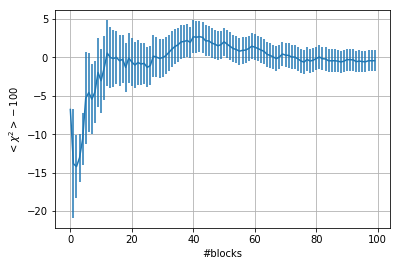

La miglior stima per chi^2 è  99.5732 +o- 1.3332303066256161


In [23]:
chi_ave, chi2_ave, chi_ave2 = np.loadtxt("chi_values.out", usecols=(0, 1, 2), delimiter=' ', unpack='true')

# Inizializzo nuovamente le variabili: questo perchè non è detto che i dati provenienti
# da questo file abbiano la stessa lunghezza di quelli precedenti, essendo parametri che 
# possono cambiare in C++

N = len(chi_ave)
n = np.arange(N)
e = np.zeros(N)

for i in range(N):
    e[i] = error(chi2_ave, chi_ave2,i)

plt.errorbar(n, chi_ave-100, e);
plt.xlabel('#blocks')
plt.ylabel('$<\chi^2>-100$')
plt.grid(True)
plt.show()

print('La miglior stima per chi^2 è ',chi_ave[N-1], '+/-', e[N-1])

### Conclusioni

Abbiamo testato il generatore tramite il calcolo Monte Carlo di due integrali e fornito una stima dell'incertezza statistica dei risultati. Nel primo caso il risultato non rientra nelle barre d'errore a 1$\sigma$ ma rientra ampiamente a 2$\sigma$: questo fatto dipende comunque solo dalla sequenza dei numeri casuali, e abbiamo verificato che con un'altra sequenza il risultato rientra invece all'interno delle barre, come accade per il secondo integrale. 

Possiamo confrontare il valore delle incertezze statistiche così ottenute con i valori teorici delle stesse, ovvero testare la validità dell'uguaglianza $(4)$. Avendo ottenuto le singole stime degli integrali a partire da sample di $N = 1000$ punti si ha

$$
\epsilon_{teor} = \sigma_f/\sqrt N = 
\left\{
	\begin{array}{ll}
		\sqrt{\frac{1/12}{1000}} \approx 0.0091287  & \mbox{se } f(x) = x \\
		\sqrt{\frac{1/450}{1000}} \approx 0.0014907 & \mbox{se } f(x) = (x - 1/2)^2.
	\end{array}
\right.
$$

La deviazione standard del valore medio calcolato con $M = 100$ stime è quindi 

$$
\sigma_{teor} =
\left\{
	\begin{array}{ll}
		\frac{\epsilon}{\sqrt{100}} \approx 0.00091287  & \mbox{se } f(x) = x \\
		\frac{\epsilon}{\sqrt{100}} \approx 0.00014907 & \mbox{se } f(x) = (x - 1/2)^2.
	\end{array}
\right.
$$

Confrontando questi numeri con quelli riportati sotto i grafici delle varie quantità, corrispondenti all'uso dello stimatore $(3)$, ci si rende conto della validità dei risultati.

Anche i test del $\chi^2$ hanno dato un risultato soddisfacente, nel senso che confermano l'ipotesi di uniformità del generatore. 